## Unsupervised Learning vs. Supervised Learning

Unsupervised learning is concerned with creating a model of the features themselves. -> It does this by finding relationships between observations and natural groups in the features.

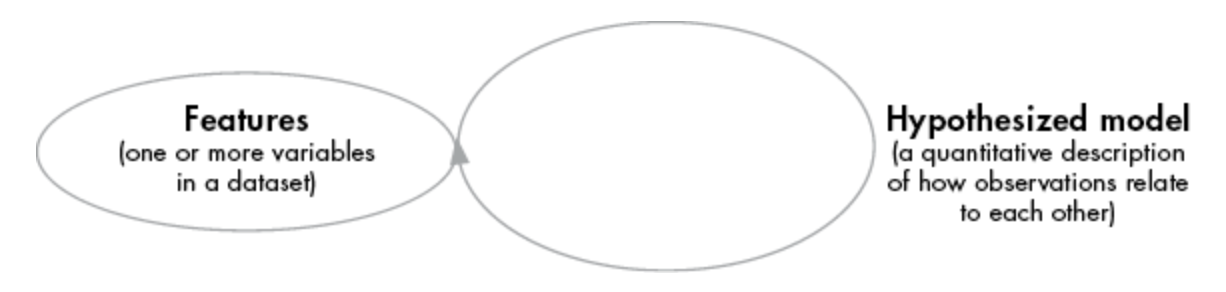

“The arrow in figure connects the features to themselves. This arrow indicates that we are finding ways that features relate to one another, such as the natural groups they form; it does not indicate a cycle or repeating process.”

## Generating and Exploring Data

In [1]:
# Rolling the Dice

from random import choices,seed
numberofrolls=1800
seed(9)
dice1=choices([1,2,3,4,5,6], k=numberofrolls)
dice2=choices([1,2,3,4,5,6], k=numberofrolls)

In [2]:
print(dice1[0:10])

[3, 3, 1, 6, 1, 4, 6, 1, 4, 4]


In [6]:
dicesum=[dice1[n]+dice2[n] for n in range(numberofrolls)]

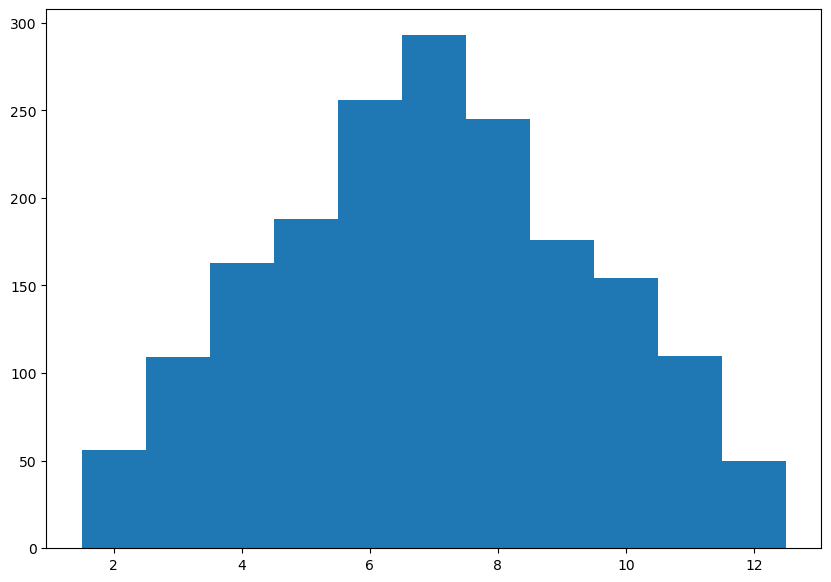

In [7]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dicesum,bins=[2,3,4,5,6,7,8,9,10,11,12,13],align='left')
plt.show()

“The more times we roll our dice, the more bell-like our histogram will become. For large numbers of dice rolls, the histogram of outcomes is closely approximated by a special distribution called the normal distribution, or Gaussian distribution.”

“Every bell curve is fully described by just two numbers: a mean, describing the center and highest point of the bell curve, and a variance, describing how widely spread out the bell curve is. The square root of the variance is the standard deviation, another measure of how widely spread out a bell curve is”

In [8]:
# calculate mean and standard deviation

def getcenter(allpoints):
    center=np.mean(allpoints)
    stdev=np.sqrt(np.cov(allpoints))
    # When we calculate a covariance of two separate lists of observations, it tells us how much those datasets vary together. 
    # When we calculate a covariance of one list of observations alone, it’s simply called the variance, and the square root of the variance is the standard deviation.
    return(center,stdev)

print(getcenter(dicesum))

(6.9511111111111115, 2.468219092930102)


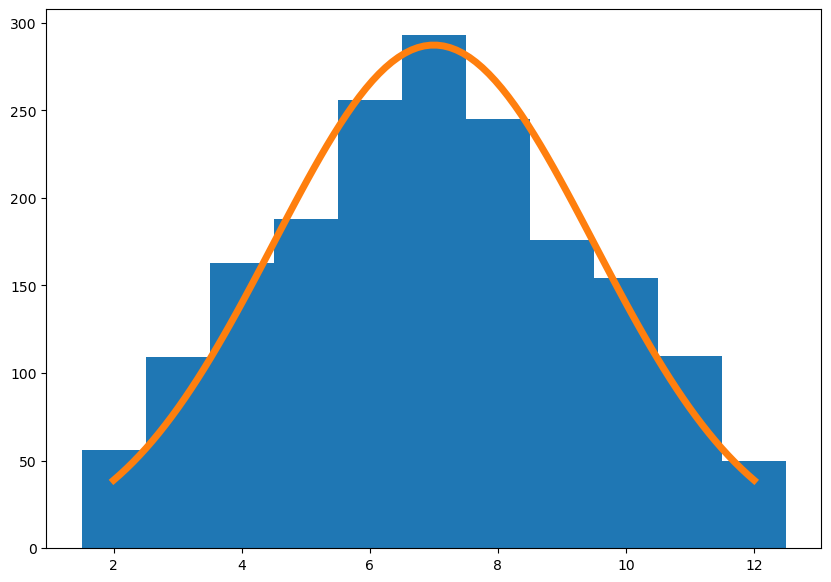

In [9]:
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dicesum,bins=range(2,14),align='left')
import scipy.stats as stats
import math
mu=7
sigma=2.5
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls,linewidth=5)
plt.show()

In [11]:
stats.norm.pdf(2, mu, sigma)*numberofrolls

38.8734958894954

In [12]:
stats.norm.pdf(7, mu, sigma)*numberofrolls

287.23844188903155

In [13]:
stats.norm.pdf(12, mu, sigma)*numberofrolls
# stats.norm.pdf() - calculates expected # of dice rolls
# norm.pdf -> normal probability density function == bell curve

38.8734958894954

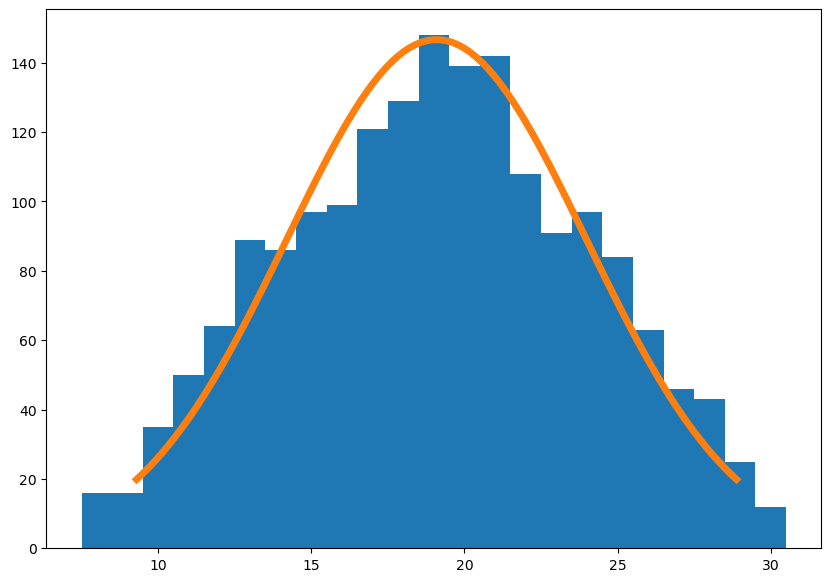

In [14]:
# Using Another Kind of Die

seed(913)
dice1=choices([4,5,6,7,8,9,10,11,12,13,14,15], k=numberofrolls)
dice2=choices([4,5,6,7,8,9,10,11,12,13,14,15], k=numberofrolls)
dicesum12=[dice1[n]+dice2[n] for n in range(numberofrolls)]
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dicesum12,bins=range(8,32),align='left')
mu=np.mean(dicesum12)
sigma=np.std(dicesum12)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls,linewidth=5)
plt.show()

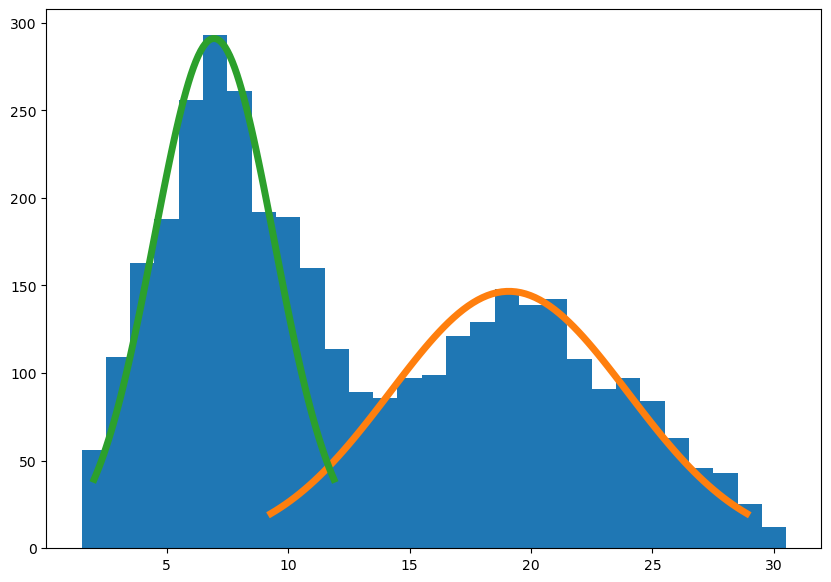

In [15]:
dicesumboth=dicesum+dicesum12
fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(dicesumboth,bins=range(2,32),align='left')
import scipy.stats as stats
import math
mu=np.mean(dicesum12)
sigma=np.std(dicesum12)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls,linewidth=5)
mu=np.mean(dicesum)
sigma=np.std(dicesum)
x = np.linspace(mu - 2*sigma, mu + 2*sigma, 100)*1
plt.plot(x, stats.norm.pdf(x, mu, sigma)*numberofrolls,linewidth=5)
plt.show()

Local peaks = modes
Two modes = bimodal histogram

## The Origin of Observations with Clustering

In [16]:
seed(494)
randomselection=choices(dicesumboth, k=1)
print(randomselection)

[12]


In [17]:
stats.norm.pdf(8, np.mean(dicesum), np.std(dicesum))*numberofrolls

265.87855493973007

In [18]:
stats.norm.pdf(8, np.mean(dicesum12), np.std(dicesum12))*numberofrolls

11.289203035758725

In [19]:
stats.norm.pdf(12, np.mean(dicesum), np.std(dicesum))*numberofrolls

35.87586208537935

In [20]:
stats.norm.pdf(12, np.mean(dicesum12), np.std(dicesum12))*numberofrolls

51.42993240324318

The goal of clustering is to answer a global version of the question we considered previously: Which pair of dice is the origin of every observation in our data?

In [21]:
from scipy.stats import multivariate_normal
def classify(allpts,allmns,allvar):
    vars=[]
    for n in range(len(allmns)):
        vars.append(multivariate_normal(mean=allmns[n], cov=allvar[n]))
    classification=[]
    for point in allpts:
        this_classification=-1
        this_pdf=0
        for n in range(len(allmns)):
            if vars[n].pdf(point)>this_pdf:
                this_pdf=vars[n].pdf(point)
                this_classification=n+1
        classification.append(this_classification)
    return classification

If the first bell curve is higher than the other bell curves at that point, we say that the point is associated with the first dice pair. 

If the second bell curve is the highest at that point, we say the point belongs to the second dice pair. 

If we have more than two bell curves, we can compare all of them, classifying every point according to which bell curve is highest.

In [22]:
allpoints = [2,8,12,15,25]
allmeans = [7, 19]
allvar = [np.cov(dicesum),np.cov(dicesum12)]

In [23]:
print(classify(allpoints,allmeans,allvar))
# This list is telling us that the first two dice rolls in our allpoints list, 2 and 8, are more likely to be 
# associated with the 6-sided dice pair. The other dice rolls in our allpoints list—12, 15, and 25—are more likely 
# to be associated with the 12-sided dice pair.

# -> clustering

[1, 1, 2, 2, 2]


## Clustering in Business Applications

- "Before the age of data science and clustering, marketers called the practice of splitting customers into groups customer segmentation.”

- “Segmentation predates clustering, but clustering is a great way to do segmentation because it enables us to find more accurate and useful segments, and precise boundaries between them.”

## Analyzing Multiple Dimensions

- Dice roll dataset is one-dimensional

Univariate bell curve - shows relative probabilites for only one variable (the x-axis)

Bivariate bell curve - shows relative probabilities varying along two dimensions: the x- and y-axes

A univariate Gaussian curve has a mean that’s represented by just one number, like x = 0 in the left side of Figure 7-7. 

A bivariate Gaussian curve has a mean that’s represented by two numbers: an ordered pair consisting of an x-coordinate and a y-coordinate, like (0, 0).

In one dimension, we use the variance (or standard deviation) as a single number that expresses the degree of spread of our curve. 

In two or more dimensions, we use a matrix, or a rectangular array of numbers, to express the degree of the bell curve’s spread. The matrix we use, called a covariance matrix, records not only how spread out each dimension is on its own but also the extent to which different dimensions vary together.

Multivariate bell curve - three or more dimensions
- In three dimensions, a mean will have three coordinates; in n dimensions, it will have n coordinates.
- The covariance matrix will also get bigger every time you increase the dimension of your problem.

## E-M Clustering

aka Gaussian mixture modeling, because it uses bell curves (Gaussian distributions) to model how groups mix together.

In [24]:
import ast
import requests
# requests package allows Python to request a file or dataset from a website

link = "https://bradfordtuckfield.com/emdata.txt"
f = requests.get(link)
allpoints = ast.literal_eval(f.text)
# literal_eval() - enables us to read list data from files that would otherwise be treated as strings

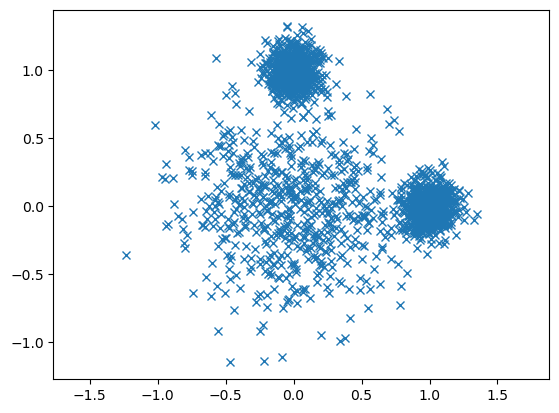

In [29]:
allxs=[point[0] for point in allpoints]
allys=[point[1] for point in allpoints]
plt.plot(allxs, allys, 'x')
plt.axis('equal')
plt.show()

###### The E-M algorithm 

E-M is short for expectation-maximization. We can describe this algorithm in four steps:

Guessing: Make guesses for the means and covariances of every cluster.

Expectation: Classify every observation in our data according to which cluster it’s most likely to be a member of, according to the most recent estimates of means and covariances. (This is called the E, or Expectation, step because we’re classifying based on our expectation of how likely each point is to be in each cluster.)

Maximization: Use the classifications obtained in the Expectation step to calculate new estimates for the means and covariances of each cluster. (This is called the M, or Maximization, step because we find the means and variances that maximize the probability of matching our data.)

Convergence: Repeat the Expectation and Maximization steps until reaching a stopping condition.

###### The Guessing Step

In [32]:
#initial guesses
mean1=[-1,0]
mean2=[0.5,-1]
mean3=[0.5,0.5]

allmeans=[mean1,mean2,mean3]

cov1=[[1,0],[0,1]]
cov2=[[1,0],[0,1]]
cov3=[[1,0],[0,1]]

allvar=[cov1,cov2,cov3] # identity matrix

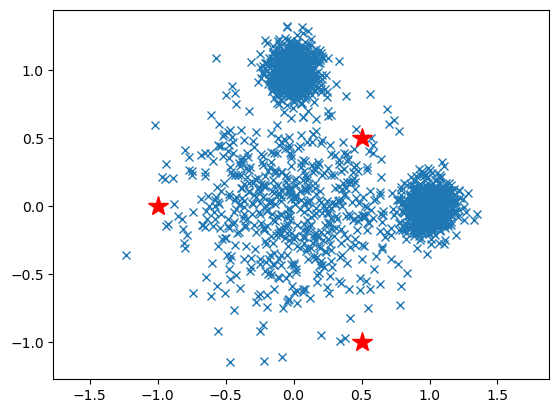

In [33]:
plt.plot(allxs, allys, 'x')
plt.plot(mean1[0],mean1[1],'r*', markersize=15)
plt.plot(mean2[0],mean2[1],'r*', markersize=15)
plt.plot(mean3[0],mean3[1],'r*', markersize=15)
plt.axis('equal')
plt.show()

###### The Expectation Step

In [35]:
theclass=classify(allpoints,allmeans,allvar)
print(theclass[:10])

[1, 1, 1, 1, 3, 1, 3, 3, 1, 3]


In [36]:
# function that will plot our data and clusters

def makeplot(allpoints,theclass,allmeans):
    thecolors=['black']*len(allpoints)
    for idx in range(len(thecolors)):
        if theclass[idx]==2:
            thecolors[idx]='green'
        if theclass[idx]==3:
            thecolors[idx]='yellow'
    allxs=[point[0] for point in allpoints]
    allys=[point[1] for point in allpoints]
    for i in range(len(allpoints)):
        plt.scatter(allxs[i], allys[i],color=thecolors[i])
    for i in range(len(allmeans)):
        plt.plot(allmeans[i][0],allmeans[i][1],'b*', markersize=15)
    plt.axis('equal')
    plt.show()

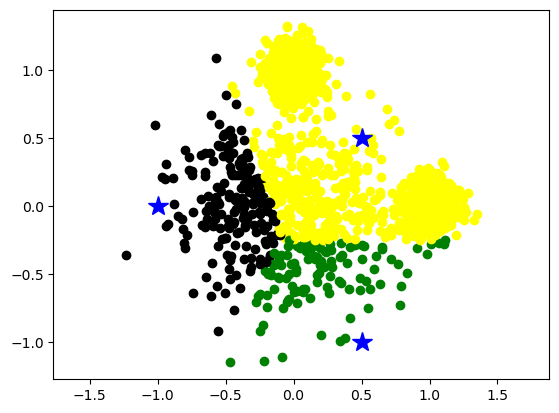

In [37]:
makeplot(allpoints,theclass,allmeans)

###### The Maximization Step

In [38]:
# updated getcenters() function

def getcenters(allpoints,theclass,k):
    centers=[]
    thevars=[]
    for n in range(k):
        pointsn=[allpoints[i] for i in range(0,len(allpoints)) if theclass[i]==(n+1)]
        xpointsn=[points[0] for points in pointsn]
        ypointsn=[points[1] for points in pointsn]
        xcenter=np.mean(xpointsn)
        ycenter=np.mean(ypointsn)
        centers.append([xcenter,ycenter])
        thevars.append(np.cov(xpointsn,ypointsn))
    return centers,thevars

In [39]:
allmeans,allvar=getcenters(allpoints,theclass,3)

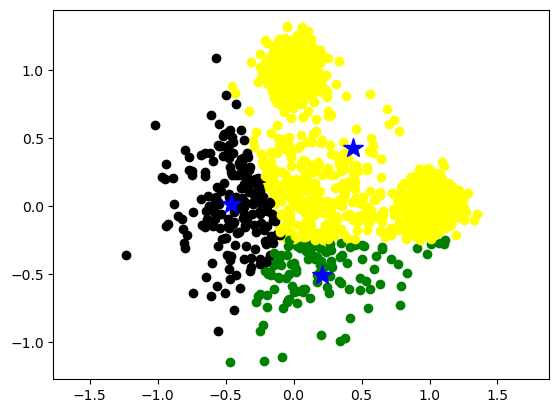

In [40]:
makeplot(allpoints,theclass,allmeans)

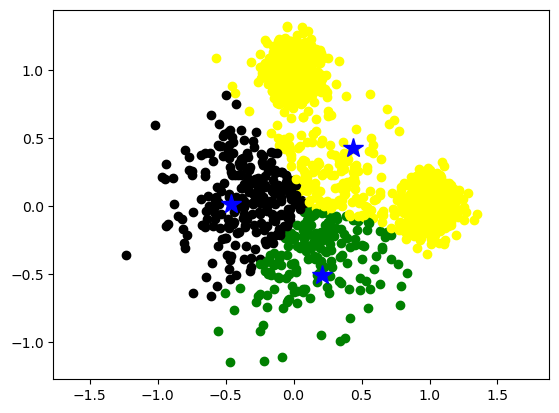

In [41]:
# run expectation step again
theclass=classify(allpoints,allmeans,allvar)
makeplot(allpoints,theclass,allmeans)

###### The Convergence Step

In [42]:
# every time we reclassify our clusters, we have to recalculate the clusters’ centers, but every time we recalculate 
# the centers, we have to reclassify the clusters. Stated another way, every time we perform the Expectation step, 
# we have to perform the Maximization step, but every time we perform the Maximization step, we have to perform the 
# Expectation step again.

for n in range(0,100):
    theclass=classify(allpoints,allmeans,allvar)
    allmeans,allvar=getcenters(allpoints,theclass,3)
    
# E-M clustering is mathematically guaranteed to converge, meaning that eventually we’ll reach a step where we 
# recalculate the centers and find the same centers we calculated in the previous step, and we reclassify the clusters 
# and find the same clusters we classified in the previous step”

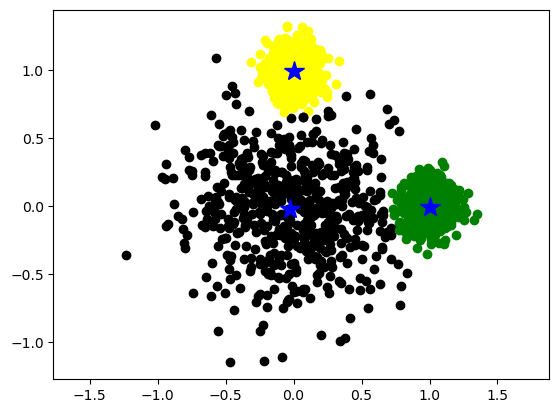

In [43]:
makeplot(allpoints,theclass,allmeans)

## Other Clustering Methods

Another method, k-means clustering, is more popular because it’s easier. The following are the steps of k-means clustering:

Guessing: Make guesses for the means of every cluster.

Classification: Classify every observation in our data according to which cluster it’s most likely to be a member of, according to which mean it’s closest to.
- With k-means clustering, we determine an observation’s cluster more simply: by measuring the distance between the observation and each cluster center, and finding which cluster center it’s closest to.

Adjustment: Use the classifications obtained in the Classification step to calculate new estimates for the means of each cluster. 
- In k-means clustering, we need to calculate only the means of each cluster—we don’t use covariance estimates at all in k-means clustering.

Convergence: Repeat the Classification and Adjustment steps until reaching a stopping condition.

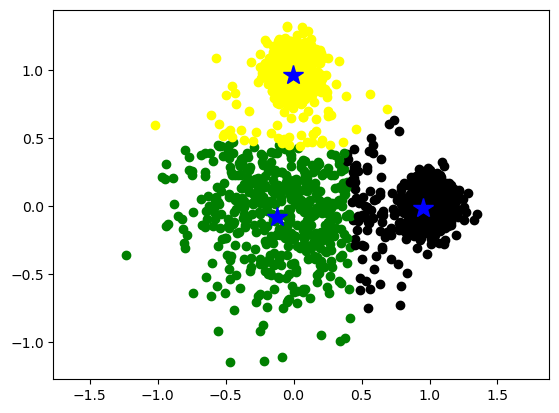

In [45]:
from sklearn.cluster import KMeans
kmeans = KMeans(init="random", n_clusters=3, n_init=10, max_iter=300, random_state=42)
kmeans.fit(allpoints)
newclass=[label+1 for label in kmeans.labels_]
makeplot(allpoints,newclass,kmeans.cluster_centers_)

One powerful yet underappreciated clustering method is called density-based spatial clustering of applications with noise (DBSCAN). Unlike E-M and k-means clustering, DBSCAN can detect clusters that have unique, nonspherical, non-bell like shapes.

Another important kind of clustering is called hierarchical clustering. Instead of simply classifying observations into groups, hierarchical clustering yields a nested hierarchy that shows groups of observations in closely related, then successively more distant groups.

## Other Unsupervised Learning Methods

Several unsupervised learning methods accomplish anomaly detection: finding observations that don’t fit with the general pattern of a dataset. <br>
Some anomaly detection methods are broadly similar to clustering methods, because they sometimes include identifying dense groups of near neighbors (like clusters) and measuring distances between observations and their closest clusters.

Another group of unsupervised learning methods are called latent variable models. <br>
These models try to express the observations in a dataset as a function of hypothetical hidden, or latent, variables.
- The E-M clustering we accomplished in this chapter can also be thought of as a type of latent variable model.